# Overlap between cells
This notebook was used to analyse TF and TG similarity between cell-types. (Figure 3.8)

In [2]:
# import packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from venn import venn

## Read in regulons

In [3]:
tf2tg_tricho = {} 
with open("/home/claudia/Desktop/UGent/Thesis/networks_second/regulons/regulons_trichoblast.txt") as f:
    for l in f.readlines():
        l = l.split("\t")
        if l[0] in tf2tg_tricho:
            tf2tg_tricho[l[0]].append(l[1].rstrip())
        else:
            tf2tg_tricho[l[0]] = [l[1].rstrip()]


In [4]:
tf2tg_cortex = {} 
with open("/home/claudia/Desktop/UGent/Thesis/networks_second/regulons/regulons_cortex.txt") as f:
    for l in f.readlines():
        l = l.split("\t")
        if l[0] in tf2tg_cortex:
            tf2tg_cortex[l[0]].append(l[1].rstrip())
        else:
            tf2tg_cortex[l[0]] = [l[1].rstrip()]


In [5]:
tf2tg_endo = {} 
with open("/home/claudia/Desktop/UGent/Thesis/networks_second/regulons/regulons_endodermis.txt") as f:
    for l in f.readlines():
        l = l.split("\t")
        if l[0] in tf2tg_endo:
            tf2tg_endo[l[0]].append(l[1].rstrip())
        else:
            tf2tg_endo[l[0]] = [l[1].rstrip()]


## TFs overlap

In [6]:
tf_venn = {
    "Trichoblast TFs": set(tf2tg_tricho.keys()),
    "Cortex TFs": set(tf2tg_cortex.keys()),
    "Endodermis TFs": set(tf2tg_endo.keys())}


<AxesSubplot:>

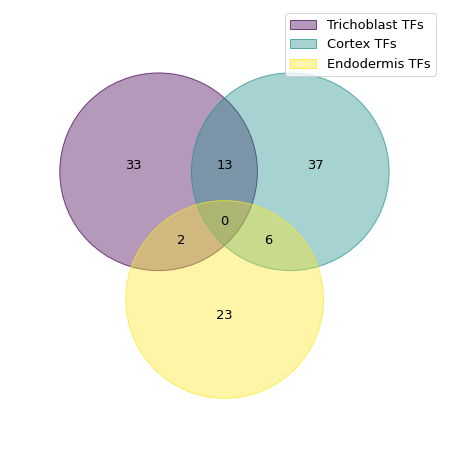

In [7]:
venn(tf_venn) 
#plt.savefig("/home/claudia/Desktop/UGent/Thesis/figures/TF_intersection.svg")

## Jaccard index of TGs

<AxesSubplot:>

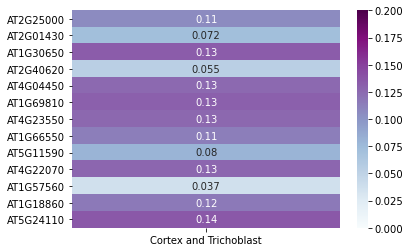

In [8]:
JI_list = []
tfs_list = list(set(tf2tg_tricho.keys()).intersection(tf2tg_cortex.keys()))
for tfs in tfs_list:
    a = tf2tg_tricho[tfs]
    b = tf2tg_cortex[tfs]
    i = len(set(a).intersection(set(b)))
    u = len(set(a).union(set(b)))
    JI_list.append(i/u)
    
sns.heatmap(np.reshape(JI_list,(13,1)),cmap="BuPu", annot=True, yticklabels=tfs_list, xticklabels=['Cortex and Trichoblast'], vmin=0, vmax=0.2)
#plt.savefig("/home/claudia/Desktop/UGent/Thesis/figures/JI_CT.svg")


<AxesSubplot:>

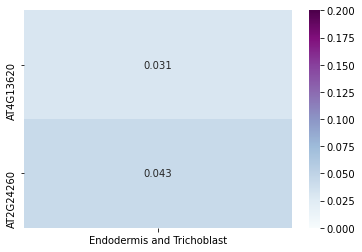

In [9]:
JI_list = []
tfs_list = list(set(tf2tg_tricho.keys()).intersection(tf2tg_endo.keys()))
for tfs in tfs_list:
    a = tf2tg_tricho[tfs]
    b = tf2tg_endo[tfs]
    i = len(set(a).intersection(set(b)))
    u = len(set(a).union(set(b)))
    JI_list.append(i/u) 

sns.heatmap(np.reshape(JI_list,(2,1)),cmap="BuPu", annot=True, yticklabels=tfs_list, xticklabels=['Endodermis and Trichoblast'], vmin=0, vmax=0.2)
#plt.savefig("/home/claudia/Desktop/UGent/Thesis/figures/JI_ET.svg")

<AxesSubplot:>

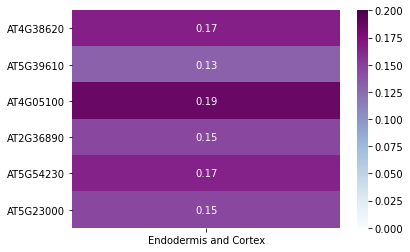

In [10]:
JI_list = []
tfs_list = list(set(tf2tg_cortex.keys()).intersection(tf2tg_endo.keys()))
for tfs in tfs_list:
    a = tf2tg_cortex[tfs]
    b = tf2tg_endo[tfs]
    i = len(set(a).intersection(set(b)))
    u = len(set(a).union(set(b)))
    JI_list.append(i/u)
    
sns.heatmap(np.reshape(JI_list,(6,1)),cmap="BuPu", annot=True, yticklabels=tfs_list, xticklabels=['Endodermis and Cortex'], vmin=0, vmax=0.2)
#plt.savefig("/home/claudia/Desktop/UGent/Thesis/figures/JI_EC.svg")